In [7]:
from Setup import *

import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Data Loading

In [8]:
df_train = pd.read_csv("C:/Users/maxpi/Desktop/Universität/Machine Learning/groupproject/archive (2)/train.csv") # insert file path
df_test = pd.read_csv("C:/Users/maxpi/Desktop/Universität/Machine Learning/groupproject/archive (2)/test.csv") # insert file path

df = pd.concat([df_test,df_train], ignore_index=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

Preprocessing

In [ ]:
import importlib
import Lasso
importlib.reload(Lasso)
from Lasso import main_lasso


# Führe die Ridge-Regression aus
best_model, metrics = main_lasso(df)

print(best_model.best_estimator_, metrics)

In [24]:
import importlib
import ElasticNet
importlib.reload(ElasticNet)
from ElasticNet import main_en


# Führe die Ridge-Regression aus
best_model, metrics = main_en(df)

print(best_model.best_estimator_, metrics)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 1.0, 'regressor__solver': 'sparse_cg'}
Best cross-validation score: 61272668.2391
Model Performance:
MSE: 59673696.23
RMSE: 7724.88
MAE: 5925.61
R²: 0.5036


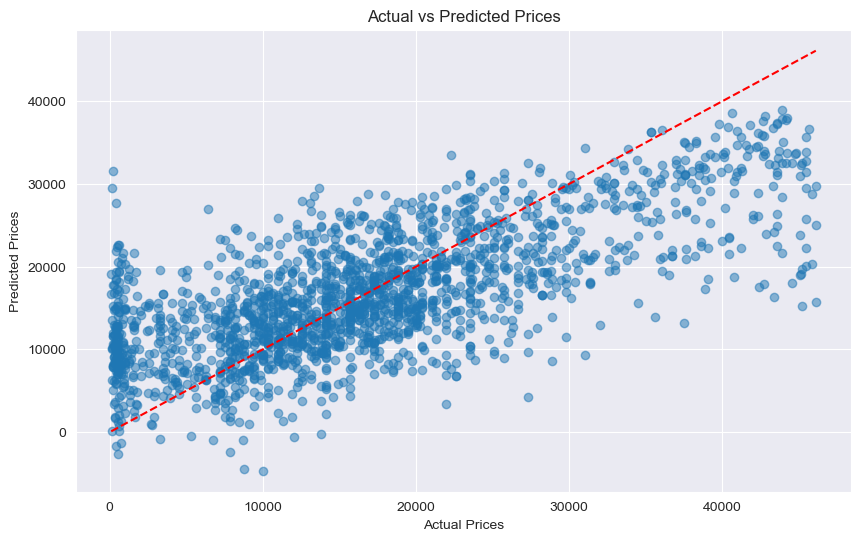

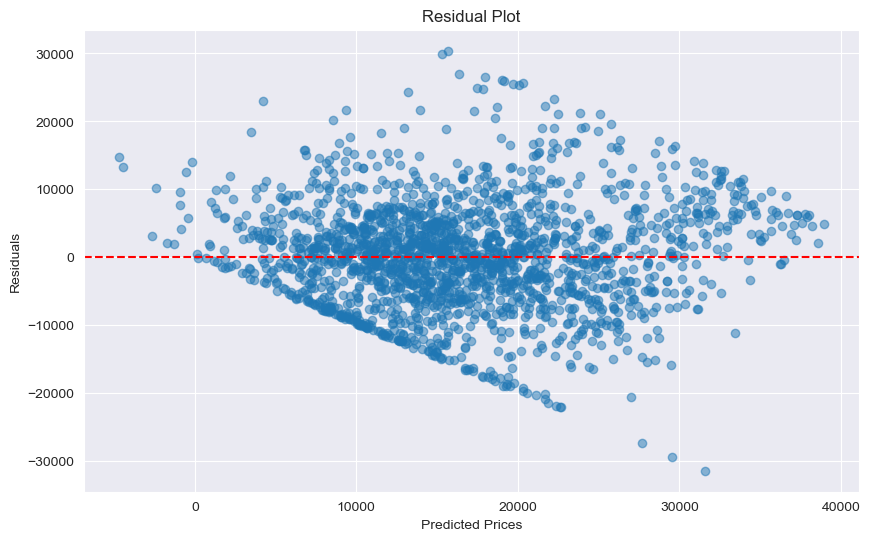

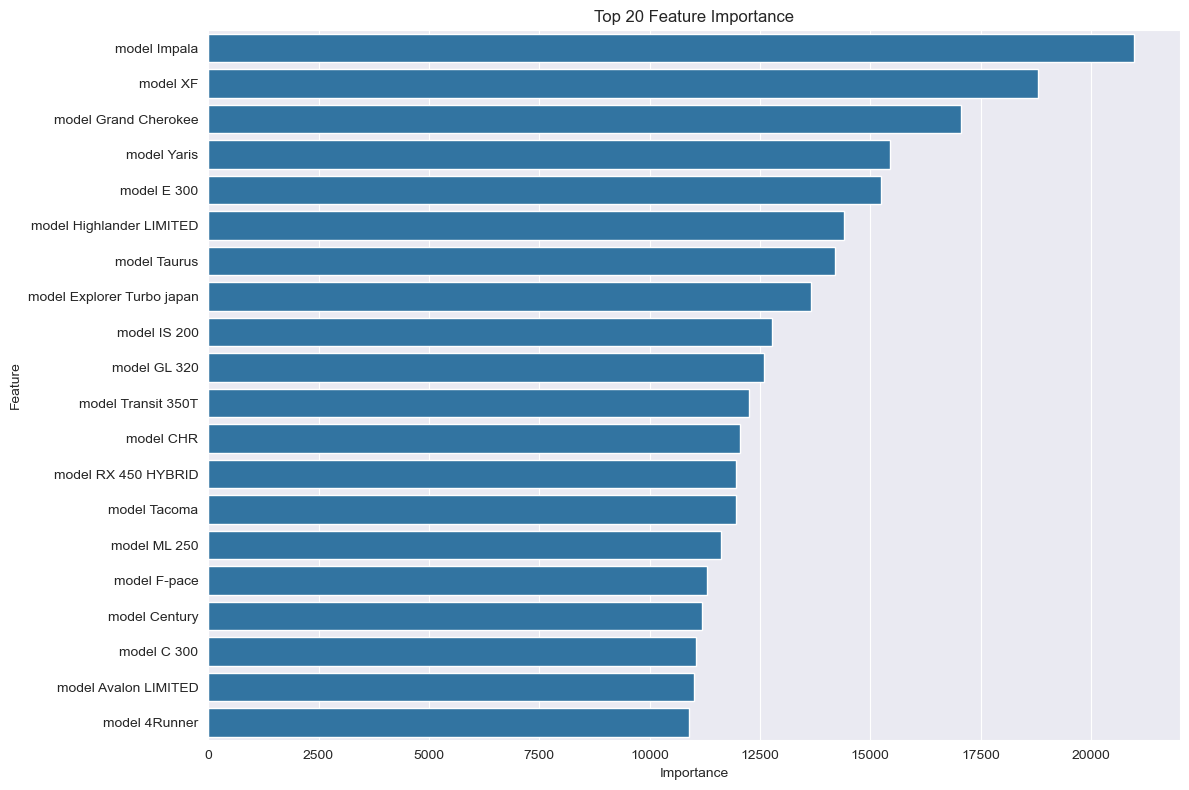

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['prod_year',
                                                   'leather_interior',
                                                   'engine_volume', 'mileage',
                                                   'cylinders', 'doors',
                                                   'airbags', 'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   S

In [30]:
import importlib
import Ridge
importlib.reload(Ridge)
from Ridge import main_ridge


# Führe die Ridge-Regression aus
best_model, metrics = main_ridge(df)

print(best_model.best_estimator_, metrics)

In [5]:
# Define functions that show multicollinearity
columns = ["cylinders"]

# Define columns with categoric variables
cat_columns = ['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type',
                    'gear_box_type', 'drive_wheels', 'wheel', 'color', 'doors']

X, y = preprocessing(df, 'price', columns, cat_columns)

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stardardizing
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Convert back to DataFrame using original feature names
x_train = pd.DataFrame(x_train, columns=X_train.columns)
x_test = pd.DataFrame(x_test, columns=X_test.columns)

# Display first few rows
x_train.head()

,prod._year,engine_volume,mileage,airbags,manufacturer_ACURA,manufacturer_ALFA ROMEO,manufacturer_ASTON MARTIN,manufacturer_AUDI,manufacturer_BENTLEY,manufacturer_BMW,...,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow,doors_3,doors_5
0,-2.621511,-0.026375,3.116697,-0.139055,-0.02994,-0.012762,-0.009024,-0.110062,0.0,-0.250281,...,-0.115251,-0.043315,-0.048649,-0.194569,-0.498549,-0.087349,-0.543663,-0.081479,-0.227225,0.227225
1,-1.615080,1.206742,-0.396390,0.352702,-0.02994,-0.012762,-0.009024,-0.110062,0.0,-0.250281,...,-0.115251,-0.043315,-0.048649,-0.194569,2.005820,-0.087349,-0.543663,-0.081479,-0.227225,0.227225
2,0.900997,0.960119,-0.506801,1.336214,-0.02994,-0.012762,-0.009024,-0.110062,0.0,-0.250281,...,-0.115251,-0.043315,-0.048649,-0.194569,-0.498549,-0.087349,-0.543663,-0.081479,-0.227225,0.227225
3,-1.950557,2.933106,-1.159231,0.352702,-0.02994,-0.012762,-0.009024,-0.110062,0.0,-0.250281,...,-0.115251,-0.043315,-0.048649,-0.194569,2.005820,-0.087349,-0.543663,-0.081479,-0.227225,0.227225
4,1.068735,-0.272999,-0.954468,-0.139055,-0.02994,-0.012762,-0.009024,-0.110062,0.0,-0.250281,...,-0.115251,-0.043315,-0.048649,5.139570,-0.498549,-0.087349,-0.543663,-0.081479,-0.227225,0.227225


Run Models

In [12]:
# Run Ranfdom Forest Model
#r_forest(x_train, y_train, x_test, y_test)


--- Tuning Random Forest on Cars Dataset Dataset ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\maxpi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


--- Results for Random Forest ---
Best Model: RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=42)
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Metrics: 
Mean Absolute Error: 6249.070139920933
Mean Squared Error: 143654057.46477818
R2 Score: 0.5994022906210434


KeyError: 'Confusion Matrix'

In [13]:
# Run Lasso Regression Model
#lasso(x_train, y_train, x_test, y_test)


--- Tuning Lasso on Cars Dataset Dataset ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\maxpi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\maxpi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+11, tolerance: 5.376e+08
  model = cd_fast.enet_coordinate_descent(


--- Results for Lasso ---
Best Model: Lasso(alpha=0.01, random_state=42)
Best Params: {'alpha': 0.01}
Metrics: 
Mean Absolute Error: 9031.945440547586
Mean Squared Error: 217148448.84429535
R2 Score: 0.3944537819716878


KeyError: 'Confusion Matrix'

In [9]:
# Run Elastic Net Regression Model
#(x_train, y_train, x_test, y_test)

In [10]:
# Run XGBoost Regression Model
#xgboost(x_train, y_train, x_test, y_test)

In [11]:
#from ML_chatgpt import *
#model, mse, r2 = run_random_forest(df)

# Drucke die Evaluationsergebnisse in einem übersichtlichen Format
#print_evaluation_results("Random Forest Regressor", mse, r2)

KeyError: 'cylinders'